0. 由于其复杂的依赖环境，必须使用 mamba 库创建虚拟环境

1. 给基础环境安装 mamba 库

```
conda install -n base mamba -c conda-forge -y
```

2. 使用 mamba 创建虚拟环境

```
mamba create -n geemap02  pygis rasterio leafmap geopandas localtileserver segment-geospatial geemap python=3.9 -c conda-forge
```

3. 激活虚拟环境

```
conda activate geemap02
```

In [1]:
import os
import ee
import geemap
ee.Initialize()
geemap.set_proxy(port="7890")

In [2]:
from samgeo import SamGeo

In [3]:
geemap.Report()

--------------------------------------------------------------------------------
  Date: Mon Jun 05 09:06:01 2023 中国标准时间

                OS : Windows
            CPU(s) : 16
           Machine : AMD64
      Architecture : 64bit
               RAM : 13.7 GiB
       Environment : Jupyter

  Python 3.9.16 | packaged by conda-forge | (main, Feb  1 2023, 21:28:38) [MSC
  v.1929 64 bit (AMD64)]

            geemap : 0.22.1
                ee : 0.1.348
        ipyleaflet : 0.17.0
            folium : 0.13.0
        jupyterlab : 3.6.3
          notebook : 6.5.4
         ipyevents : 2.0.1
         geopandas : 0.12.2
   localtileserver : 0.6.4
--------------------------------------------------------------------------------

In [4]:
Map = geemap.Map(basemap="SATELLITE")
point = ee.Geometry.Point(114.024938132, 30.532181687)
yangtzeu = "../data/tif/yangtzeu_wh_L17.tif"
image = ee.Image(Map.add_raster(yangtzeu, alpha=0.5, layer_name="长江大学武汉校区"))
Map.centerObject(point, 16)
Map

Map(center=[30.532181687, 114.02493813200002], controls=(WidgetControl(options=['position', 'transparent_bg'],…

## 配置输出环境

In [5]:
tif_dir = os.path.join(
    os.path.expanduser("./output/"),
    'tif'
)
if not os.path.exists(tif_dir):
    os.makedirs(tif_dir)

shp_dir = os.path.join(
    os.path.expanduser("./output/"),
    'shp'
)
if not os.path.exists(shp_dir):
    os.makedirs(shp_dir)

## 训练模型

In [6]:
sam = SamGeo(
    model_type="vit_h",
    checkpoint="sam_vit_h_4b8939.pth",
    device=None,
    sam_kwargs=None,
)

In [7]:
out_mask = os.path.join(tif_dir, "yangtzeu_wh_masks.tif")

In [8]:
sam.generate(yangtzeu, out_mask, foreground=True, unique=True)

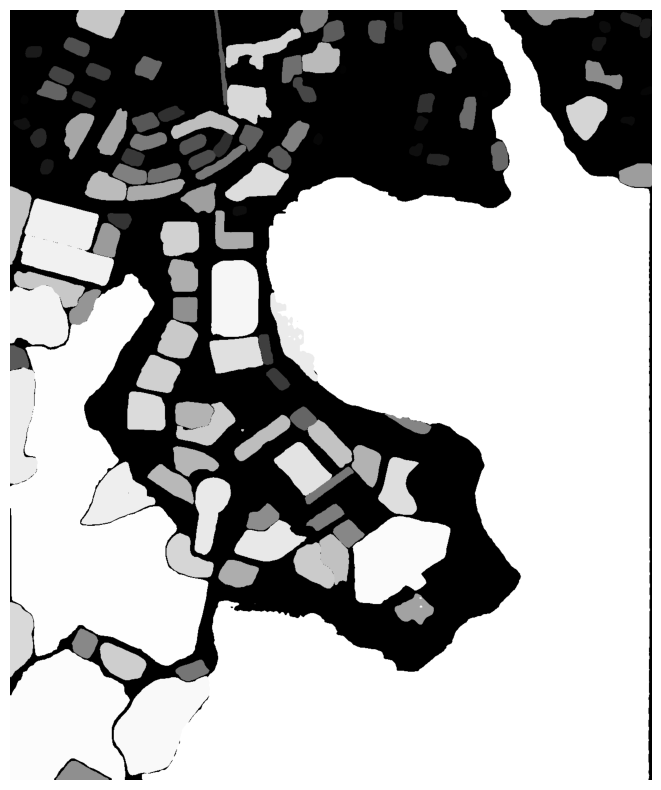

In [9]:
sam.show_masks(cmap="binary_r")

In [10]:
out_annotation = os.path.join(tif_dir, "yangtzeu_wh_annotations.tif")

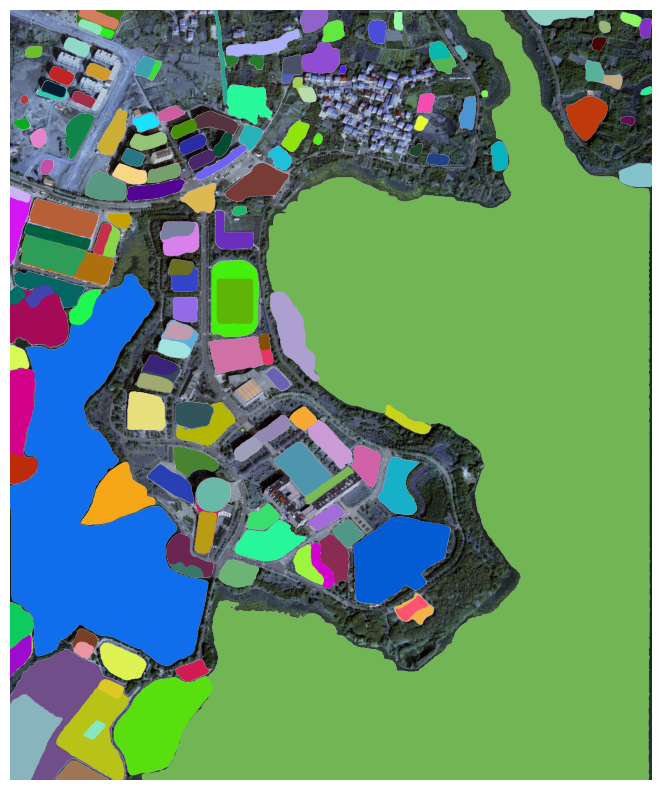

In [11]:
sam.show_anns(axis="off", alpha=1, output=out_annotation)

In [12]:
out_mask_shp = os.path.join(shp_dir, "yangtzeu_wh_masks.shp")

In [13]:
Map.add_raster(out_annotation, alpha=0.5, layer_name="Masks")
Map

Map(bottom=3446831.0, center=[30.53374719811603, 114.02572631835939], controls=(WidgetControl(options=['positi…

In [14]:
sam.tiff_to_vector(out_mask, out_mask_shp)

## 可视化结果

In [15]:
style = {
    "color": "#3388ff",
    "weight": 2,
    "fillColor": "#7c4185",
    "fillOpacity": 0.5,
}
Map.add_vector(out_mask_shp, layer_name="Vector", style=style)
Map

Map(bottom=3446831.0, center=[30.53375244140625, 114.02572631835938], controls=(WidgetControl(options=['positi…